## Week 2 Lab exercises

In this week we will use python to explore strange new worlds, to seek out new life and new civilisation, and to boldly code what no one has coded before. 

The goal is to familiarise yourself with using functions, loops, arrays and plotting in Python, and to illustrate some of the software carpentry points that we discussed in the lecture.

In [10]:
# first we import the libraries we need
import numpy as np
import matplotlib.pyplot as plt

# The following lines makes the plots appear in another window - if using AppsAnywhere they may appear
# in another window behind the notebook, and you may have to rearrange the desktop to see them. However, 
# I've commented it out because it doesn't always work. You can try it if you have time.
%matplotlib 

# This makes the plots appear in the notebook 
%matplotlib inline

Using matplotlib backend: inline


### ACTIVITY 1: 
In the code below, change the line as marked (UPDATE ME) to get the asteroid data from the data file `asteroid_locations.dat` that is in the `/data` folder

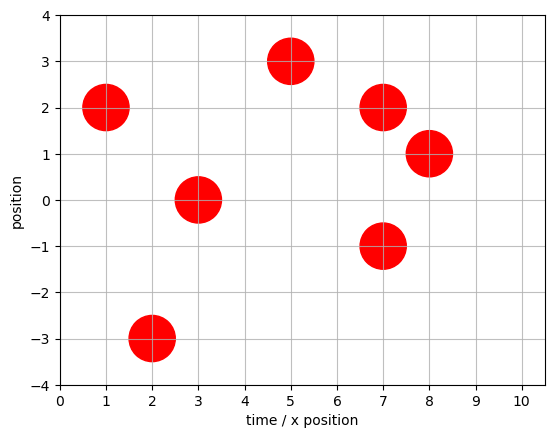

In [3]:
# Set up the plotting

def plot_asteroid_field(ax) :
    plt.axis([0,10.5,-4,4])
    major_ticks = np.arange(0, 11, 1)
    ax.set_xticks(major_ticks)
    plt.xlabel("time / x position")
    plt.ylabel("position")
    ax.set_aspect('equal')
    ax.grid(which='major', alpha=0.8)

    # Mark the asteroid positions onto the plot - read in the data from data/asteroid_locations.dat
    # HINT: the function you need is called loadtxt
    # asteroid_locations= np.array([[0,0], [0,0]]) # UPDATE ME!
    asteroid_locations=np.loadtxt("data/asteroid_locations.dat")
    for location in asteroid_locations :
        circle=plt.Circle(location, 0.5 , color='r')
        ax.add_artist(circle)
    #plt.pause(0.3)

# Test the plot
fig = plt.figure()
ax = plt.gcf().gca()
plot_asteroid_field(ax)
plt.show()

In [4]:
# set up a list to store the times and positions
list_of_times = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
list_of_y_positions = np.zeros_like(list_of_times)

# print off the initial values of the times and positions
print("The list of times at the start is ", list_of_times)
print("The list of y positions at the start is ", list_of_y_positions)

The list of times at the start is  [ 0  1  2  3  4  5  6  7  8  9 10]
The list of y positions at the start is  [0 0 0 0 0 0 0 0 0 0 0]


### ACTIVITY 2: 

Captain Katy has asked you to plot a flight path through the asteroid field. If you run the code below you will see that the path does not currently avoid the asteroids :-( Update it so that it does! 

Also update so that the distance moved is calculated, and try to minimise this.

RULES:

- Just like in a retro video game, the ship must move one step forward in the x direction at every timestep, and you can only change its movement in the y direction to avoid the asteroids.
- You should move in whole steps in the (x and) y direction, so you are always on integer coordinates.
- You must end the flight back at position y=0.
- Don't hit the asteroids! Note that their radius is 0.5 of a distance unit, so it is not sufficient to simply avoid the coordinates on which they are centred.

#### BUT FIRST

Remember *defensive programming*? You will see that the code does not check that it does what it should - i.e., it does not check that we have not hit an asteroid, and that we return to the zero position at the last step. Implement tests to check the rules _BEFORE_ you implement the code to set the path, and use asserts to make it quit with an error message if it fails.

*TIP: You probably want to write any tests as a separate function. Would it be better to call them at each step or just at the end?*

In [5]:
#Tests

#Rule 1:
def test_x_movement_not_change(a_list_of_times) :
    time_size = np.size(a_list_of_times)
    assert (a_list_of_times == np.arange(time_size)).all(), 'Cannot change the time' #use .all() to enforce equality for all elements

#broken_list_of_times = np.array([1,1,2,3,4,5,6,7,8,9,10])
#test_x_movement_not_change(broken_list_of_times)

#Rule 2: Test that the y positions are all of time integer, cannot move in non-integer steps
def test_y_movement_is_integer(a_list_of_y_positions) :
    assert (a_list_of_y_positions.dtype=='int64'), 'Cannot move in non-integer steps'

#broken_list_of_y_positions = np.array([0.5,0,0,0,0,0,0,0,0,0,0])
#test_y_movement_is_integer(broken_list_of_y_positions)

#Rule 3: Test final position at y=0
def test_final_position(a_list_of_y_positions):
    last_index = np.size(a_list_of_y_positions)-1 #the last index of the array is the num of elements-1
    assert a_list_of_y_positions[last_index] == 0, 'Must end at y=0'

#broken_list_of_y_positions = np.array([0,0,0,0,0,0,0,0,0,0,10])
#test_final_position(broken_list_of_y_positions)

#Rule 4: Avoid the asteroids
def test_avoiding_asteroids(a_list_of_times, a_list_of_y_positions):
    asteroid_locations=np.loadtxt("data/asteroid_locations.dat")

    # This one just tests we are avoiding the asteroids at the integer locations
    for iloc, location in enumerate(asteroid_locations):
        for ix, x_position in enumerate(a_list_of_times):
            distance_to_asteroid = np.sqrt((location[0] - x_position)**2.0 + (location[1] - a_list_of_y_positions[ix])**2.0)
            message = 'You have hit an asteroid at ' + str(location)
            assert distance_to_asteroid>0.5, message

    # this one does the harder case of actually making sure the lines don't cross the spheres 
    for iloc, location in enumerate(asteroid_locations):
        for ix, x_positions in enumerate(a_list_of_times):
            if ix>0:
                # Find the equation of the lime through the segment between point ix and ix-1, y=mx+c
                x2 = float(a_list_of_times[ix])
                x1 = float(a_list_of_times[ix-1])
                y2 = float(a_list_of_y_positions[ix])
                y1 = float(a_list_of_y_positions[ix-1])
                x_asteroid = float(location[0])
                y_asteroid = float(location[1])
                m_line = (y2-y1)/(x1-x2)
                c_line = y1-m_line*x1
                
                # The line that intersects perpendicularly (at an angle on 90degrees)
                # Treat the special case of zero gradient (Note that we can never have a vertical line as we always need to move forward
                if (m_line == 0.0) :
                    x_intersect = x_asteroid
                    y_intersect = y2
                    
                # Now the more general case
                else : 
                    m_perpendicular = -1.0 / m_line
                    c_perpendicular = y_asteroid - m_perpendicular * x_asteroid
                
                    # Now find the intersection point (x_intersect, y_intersect)
                    x_intersect = (c_line - c_perpendicular) / (m_perpendicular - m_line)
                    y_intersect = m_line * x_intersect + c_line
            
                point_is_within_segment = False
                if ((x_intersect <= x2) and (x_intersect >= x1) and
                    (y_intersect <= y2) and (y_intersect >= y1)) :
                    point_is_within_segment = True
                
                if point_is_within_segment :  
                
                    # Find the minimum distance between asteroid and line
                    distance_to_asteroid = np.sqrt((x_intersect - x_asteroid)**2.0 + 
                                                   (y_intersect - y_asteroid)**2.0)
                    avoids_asteroids = (distance_to_asteroid > 0.5)
             
                    message = 'You have hit an asteroid at ' + str(location)
                    assert avoids_asteroids, message
                    
#broken_list_of_y_positions = np.array([0, -1, -3, 1, 0, 0, 0, 0, 0, 0, 0])
#initial_list_of_times = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
#test_avoiding_asteroids(initial_list_of_times, broken_list_of_y_positions)

In [6]:
# Function for calculating the distance travelled
def calculate_distance_travelled(a_list_of_times, a_list_of_y_positions) :
    distance_travelled = 0
    for ix, x_position in enumerate(a_list_of_times) :
        if ix > 0 :
            distance_travelled += np.sqrt((a_list_of_times[ix-1] - a_list_of_times[ix])**2.0 
                                         +(a_list_of_y_positions[ix-1] - a_list_of_y_positions[ix])**2.0)
    return distance_travelled

The list of times at the end is  [ 0  1  2  3  4  5  6  7  8  9 10]
The list of y positions at the end is  [0 1 1 1 1 1 1 1 0 0 0]


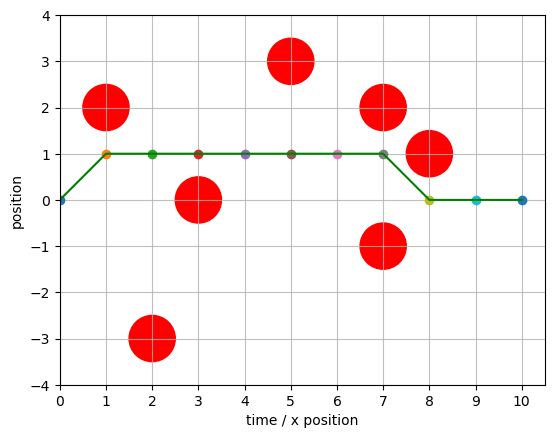

I moved a total of  10.82842712474619  units


In [7]:
# Plot again the asteroid field, so that we can plot the path on top of it
plt.ion() # Make the plotting interactive so we can update the path as we fly
fig = plt.figure()
ax1 = plt.gcf().gca() #this stands for get current figure, get current axis
plot_asteroid_field(ax1)

# go through the list of times, where index is the index within the 
# list, and time_now is the entry at that index
for index, time_now in enumerate(list_of_times) :

    # The if segment below defines what the step size is and 
    # takes that step and adds it to the previous location
    
    # the list of things to do when at a certain time starts with an 'if'
    # start with time is zero, we start at position 0
    if time_now == 0 :
        list_of_y_positions[index] = 0
    
    # alternative option denoted by 'elif' (= else if)
    # ie, if the time is between 1 and 3
    elif (time_now > 0 and time_now < 2) :
        step_size = 1
        # moving y position by the step size
        list_of_y_positions[index] = list_of_y_positions[index - 1] + step_size
        
    # UPDATE ME!
    # Add more else if options here to cover all the times you need to move the ship
    # (Try to make this as minimal as possible, rather than writing one elif statement
    # per time step)
    elif (time_now == 8):
        step_size = -1
        # moving y position by the step size
        list_of_y_positions[index] = list_of_y_positions[index - 1] + step_size

    # if the time is equal to to the last element
    elif (time_now == np.size(list_of_y_positions) - 1) :
        # move back to the start in one timestep
        step_size = - list_of_y_positions[index - 1]

    # finally, give the default option for all other cases using 'else'
    else :
        # nothing happens at other times
        step_size = 0
        # moving y position by the step size
        list_of_y_positions[index] = list_of_y_positions[index - 1] + step_size

    # this code creates the dots that mark the path followed
    position_now = list_of_y_positions[index]
    plt.plot(time_now, position_now, 'o')
    #plt.pause(0.3) # This pause just slows down the plotting so it looks nicer

    #Impose the tests
    test_y_movement_is_integer(list_of_y_positions)
    test_x_movement_not_change(list_of_times)

print("The list of times at the end is ", list_of_times)
print("The list of y positions at the end is ", list_of_y_positions)

test_final_position(list_of_y_positions)
test_avoiding_asteroids(list_of_times, list_of_y_positions)

# this code adds the line that connects the dots in the graph 
plt.plot(list_of_times, list_of_y_positions, 'g-')
plt.show()

# Uncomment to save the figure
# plt.savefig("flight_path.png")

# Print out some information
total_distance_moved = calculate_distance_travelled(list_of_times, list_of_y_positions) # UPDATE ME!
print("I moved a total of ", total_distance_moved, " units")

### ACTIVITY 3:

Now we are on an exploratory mission. Captian Katy wants you to plot a course for all of the blue (M or Minshara-class) planets on the map contained in `data/planet_locations.dat`, but not touching any of the other dangerous D-class pink planets. 

Again you need to update the code below to get the data from the data files.

How could the read-in of the data (in particular checking of the class of the planet) be improved?

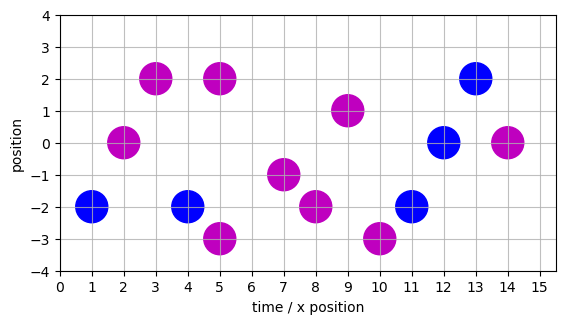

In [19]:
# Plot the planetary locations

def plot_planet_locations(ax) :
    plt.axis([0,15.5,-4,4])
    major_ticks = np.arange(0, 16, 1)
    ax.set_xticks(major_ticks)
    plt.xlabel("time / x position")
    plt.ylabel("position")
    ax.set_aspect('equal') #same scaling for x and y axis
    ax.grid(which='major', alpha=0.8)

    # Mark the planet positions onto the plot - read in the data from data/planet_locations.dat
    # HINT: the function you need is called loadtxt
    planet_locations= np.loadtxt("data/planet_locations.dat") # UPDATE ME!

    for index, location in enumerate(planet_locations) :
        is_minshara_class =  (location[2] == 1)
        coordinates = np.array([location[0],location[1]])
        if(is_minshara_class) :
            circle=plt.Circle(coordinates, 0.5, color='b')
            plt.gcf().gca().add_artist(circle)
        else : # other planets are dangerous D class planets
            circle=plt.Circle(coordinates, 0.5, color='m')
            plt.gcf().gca().add_artist(circle)  

# Test the plot
fig = plt.figure()
ax = plt.gcf().gca()
plot_planet_locations(ax)
plt.show()

### ACTIVITY 4:

Update the code below to make sure you visit all the M class planets as your Captain has asked (same rules of motion as above). What is the shortest distance in which you can do this? Update the code to calculate your value.

Again, you should _first write code that checks that the code does what it should_, and then implement the actual actions.

In [24]:
#Test that we visited all M class planets and didn't hit pink planets
def test_visited_planets(a_list_of_times, a_list_of_y_positions):
    planet_data = np.loadtxt("data/planet_locations.dat")
    for idat, planet_datum in enumerate(planet_data): #loop through planets
        is_m_class_planet = (planet_datum[2]==1)
        if is_m_class_planet: 
            location=(planet_datum[0], planet_datum[1])
            have_visited_planet = False 
            for ix, x_position in enumerate(a_list_of_times):
                #check that I visited m-class planet by comparing locations
                locations_match = (a_list_of_times[ix]==location[0] and a_list_of_y_positions[ix]==location[1])
                if (locations_match):
                    have_visited_planet = True
            message = 'You have missed the planet at ' + str(location)
            assert have_visited_planet, message

#Test for the test 
#list_of_times = np.arange(16)
#broken_list_of_y_positions = np.array([0,-2,-2,-2,-2,-2,-2,-2,-3,-2,-2,-2,0,1,2,0])
#test_visited_planets(list_of_times, broken_list_of_y_positions)

The list of times at the start is  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
The list of positions at the start is  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The list of times at the end is  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
The list of positions at the end is  [ 0 -2 -2 -2 -2 -2 -2 -2 -3 -2 -2 -2  0  2  2  0]


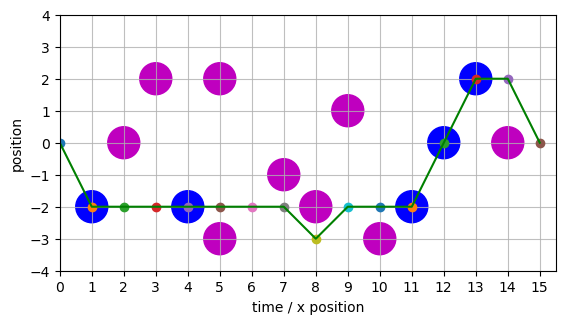

I moved a total of  20.77269903474535  units


In [25]:
# Plot again the asteroid field, so that we can plot the path on top of it

# Uncomment this to make the plotting interactive so we can update the path as we fly
# Need to also uncomment the %matplotlib command in the first cell, and plot.pause() below
plt.ion()

# Regular plotting stuff
fig = plt.figure()
ax = plt.gcf().gca()
plot_planet_locations(ax)

# set up a list to store the times and positions
final_time = 15
list_of_times = np.arange(final_time+1)
list_of_y_positions = np.zeros_like(list_of_times)

# we want to track how much we have moved during the simulation
# so zero this
total_distance_moved = 0

# print off the initial values of the times and positions
print("The list of times at the start is ", list_of_times)
print("The list of positions at the start is ", list_of_y_positions)

# go through the list of times, where index is the index within the 
# list, and time_now is the entry at that index
for index, time_now in enumerate(list_of_times) :
    
    # the list of things to do when at a certain time starts with an 'if'
    # start with time is zero, we start at position 0
    if time_now == 0 :
        list_of_y_positions[index] = 0
    
    elif (time_now > 0 and time_now < 2) :
        step_size = - 2
        # moving y position by the step size
        list_of_y_positions[index] = list_of_y_positions[index - 1] + step_size
        
    # UPDATE ME!
    # Add more else if options here to cover all the times you need to move the ship
    elif (time_now >7 and time_now<9) :
        step_size = - 1
        list_of_y_positions[index] = list_of_y_positions[index-1] + step_size

    elif (time_now >8 and time_now<10) :
        step_size = 1
        list_of_y_positions[index] = list_of_y_positions[index-1] + step_size

    elif (time_now > 11 and time_now < 14) :
        step_size = 2
        list_of_y_positions[index] = list_of_y_positions[index-1] + step_size

    elif (time_now == np.size(list_of_y_positions)-1): #last point in time
        step_size = - 2
        #list_of_y_positions[index - 1]
        list_of_y_positions[index] = list_of_y_positions[index-1] + step_size

    # finally, give the default option for all other cases using 'else'
    else :
        # nothing happens at other times
        step_size = 0
        list_of_y_positions[index] = list_of_y_positions[index - 1] + step_size

    position_now = list_of_y_positions[index]
    plt.plot(time_now, position_now, 'o')
    # Uncomment this for interactive version
    # plt.pause(0.4)

print("The list of times at the end is ", list_of_times)
print("The list of positions at the end is ", list_of_y_positions)

plt.plot(list_of_times, list_of_y_positions, 'g-')
plt.show()

# Uncomment to save the figure
#plt.savefig("myplot2.png")

# Calculate and print out some information
total_distance_moved = calculate_distance_travelled(list_of_times, list_of_y_positions)
print("I moved a total of ", total_distance_moved, " units")

### ACTIVITY 5:

Which software carpentry features are already implemented?

1. There are comments to help the reader know what is happening, but not too many
2. The names respect the rules about functions being verbs, variables being nouns and bools being questions.
3. The names of the functions / variables make it readable even without comments, they are not abbreviated
4. It is saved in GitHub
5. It has tests implemented before the code was implemented
6. The tests use assertions to check validity of data
7. Where there are similar operations on e.g. x and y coordinates, I try to align the code blocks so that the y are directly under the x (see for example distance_to_asteroid) - this aids visual debugging by checking the indices match



### ACTIVITY 6:

*Timing*: the code is very short but it is still useful to time the `for` loop to see how long it is taking and understand how it could be optimised. Add something that returns the time taken for it to run. Change the pause time for the plotting and check that the time to run changes appropriately. (I would just google "how to time function in python").

### ACTIVITY 7:

Suggest other ways to improve the code. Free to use your imagination and suggest major changes (you don't need to implement them unless you want to).

1. The use of elements of list_of_times as interchangeable with x coordinates is a bit poor - one should really define a speed and use that to calculate a list_of_x_positions from the times.

2. Better still, since the rules require one step forward at every times step, we could probably do away with the list_of_times altogether and create the x coordinates in the loop - then we wouldn't need an assert to check the list hasn't been modified.

3. It would be better to save and access the x and y coordinates as a list of tuples (x,y) rather than having them in separate vectors.

4. Maybe we could figure out the step_size needed dynamically by checking the next x-coordinate locations ahead for asteroids or planets, and minimising the distance moved. Disadvantage : this will find a local minimum distance at each step but not the global one, but is more liked to be how an AI system would navigate in time.

5. We could write a path finder algorithm like those used by google maps to find the minimum path avoiding or visiting certain points.

